<div style="text-align:center; font-family:Georgia, serif; background-color:#f5f5f5; padding:10px;">

  <h1 style="margin:0; padding:8px 0;">
    Assignment 1
  </h1>

  <h3 style="margin:0; padding:6px 0;text-decoration: underline;">
    Machine Leqarninhg and Optimization ELL7285
  </h3>
</div>

<div style="text-align:center; font-family:Georgia, serif; background-color:#f5f5f5; padding:10px;">
  <h3 style="margin:0; padding:6px 0;">
    Problem : Identify the number of linearly separable Boolean functions with n=2, 3, and 4 variables. 
  </h3>

</div>


A function is `linearly separable` if there exists a hyperplane in $n$-dimensional space that can perfectly separate the points where the function is $True$ (1) from the points where it is $False$ (0).For a Boolean function with $n$ variables, there are $2^n$ possible input combinations, and a total of $2^{2^n}$ possible `Boolean functions`. As $n$ increases, the fraction of these functions that are linearly separable decreases rapidly.

In [24]:
import numpy as np
import pandas as pd
from itertools import product

#### Let us take `Truth Table` approach to analyse the boolean functions

`product([0, 1], repeat=n)` creates every possible combination of `0s and 1s` for $n$ variables. It is a clean way to generate **Truth Table Inputs**. We can generate that in the following way: 

- Suppose we want truth table inputs of 2 variables. Then we do as follow:

In [25]:
inputs_var2 = list(product([0, 1], repeat=2))
inputs_var2

[(0, 0), (0, 1), (1, 0), (1, 1)]

- For 3 variables : 

In [26]:
inputs_var3 = list(product([0, 1], repeat=3))
inputs_var3

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

- For 4 variables: 

In [27]:
inputs_var4 = list(product([0, 1], repeat=4))
inputs_var4

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

#### Now how can we create outputs? 

Let's use $n=2$ as an example. 

The truth table has $2^2 = 4$ rows. We want to generate function number $i=6$.

- `bin(i)`: Converts the integer to a binary string.`bin(6)` $\rightarrow$ `'0b110'`

- `[2:]`: Strips off the `'0b` prefix.`'110'`.

- `zfill(2**n)`: Pads the string with leading zeros until it matches the number of rows in the truth table ($2^2=4$).

- `'0110'` for x in ...: Loops through each character ('0', '1', '1', '0').

- `int(x)`: Converts the characters back into actual integers.Result: [0, 1, 1, 0]

In [28]:
n=2
f_i = []
num_functions1 = 2**(2**n)
for i in range(num_functions1):
    function_table_test = [int(x) for x in bin(i)[2:].zfill(2**n)]
    f_i.append(function_table_test)
f_i

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1]]

In [29]:
f_i_transposed = [list(row) for row in zip(*f_i)]
f_i_transposed

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]]

Above we have seen how to generate inputs. Now lets connect that inputs with posible boolean function outputs and create a data frame to see how the different function outputs corresponding to its inputs will look like

#### Inputs 

In [30]:
df_inputs = pd.DataFrame(data = inputs_var2, columns = ["x1" , "x2"])
df_inputs

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


#### Outputs

In [31]:
n= 2**4
df_f_i= pd.DataFrame(data = f_i_transposed, columns = [f"f{i}" for i in range(n)])
df_f_i

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15
0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1
2,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1
3,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


#### Final Truth Table :

In [32]:
df_TruthTable = df_inputs.join(df_f_i)
df_TruthTable

,x1,x2,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15
0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1
2,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1
3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


In [33]:
n = 2
inputs = np.array(list(product([0, 1], repeat=n)))
num_function4 = 2**(2**n)

#### Now, we can check if `fi`'s are linearly separable or not, corresponding to the given inputs
xi's are inputs and fi's are possible outputs. Let us train the perceptron to learn the separation

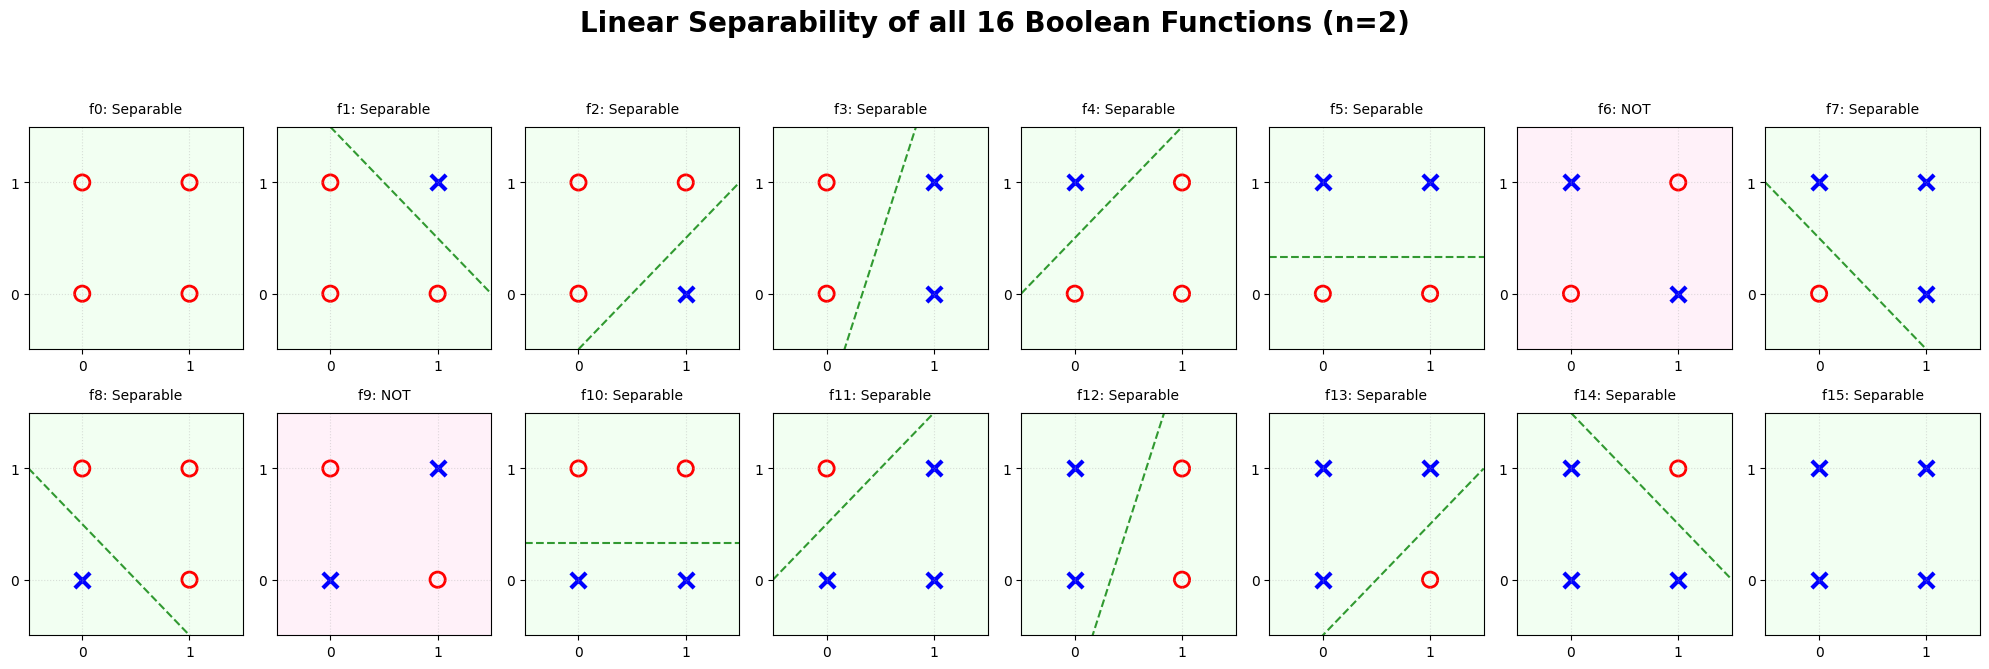

In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron


fig, axes = plt.subplots(2, 8, figsize=(20, 7))
fig.suptitle('Linear Separability of all 16 Boolean Functions (n=2)', fontsize=20, fontweight='bold')

for i in range(num_function4):
    ax = axes[i // 8, i % 8]
    
    y = np.array([int(x) for x in bin(i)[2:].zfill(4)])
    ax.scatter(inputs[y==0, 0], inputs[y==0, 1], marker='o', s=120, edgecolors='r', facecolors='none', linewidth=2, label='0')
    ax.scatter(inputs[y==1, 0], inputs[y==1, 1], marker='x', s=120, c='b', linewidth=3, label='1')

    num_classes = len(np.unique(y))
    is_separable = False
    clf = None

    if num_classes > 1:
        clf = Perceptron(tol=1e-3, random_state=42)
        clf.fit(inputs, y)
        if clf.score(inputs, y) == 1.0:
            is_separable = True
    else:
        is_separable = True

    if is_separable:
        ax.set_facecolor('#f2fff2') # Light Green
        status = "Separable"
        
        if clf is not None:
            w = clf.coef_[0]
            b = clf.intercept_[0]
            
            if w[1] != 0:
                x_vals = np.array([-0.5, 1.5])
                y_vals = -(w[0] * x_vals + b) / w[1]
                ax.plot(x_vals, y_vals, '--', c='green', alpha=0.8)
            else:
                ax.axvline(-b/w[0], color='green', linestyle='--', alpha=0.8)
    else:
        ax.set_facecolor('#fff1f9') # Light Red
        status = "NOT"

    ax.set_title(f'f{i}: {status}', fontsize=10, pad=10)
    ax.set_xlim(-0.5, 1.5); ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
    ax.grid(True, linestyle=':', alpha=0.4)

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

#### Clearly we can observe that 14 Functions out of 16 are linearly separable. 

As we have seen above we have identified the number of linearly separable functions using perceptron. But for n = 4 it is around 65,536 possible functions to analyse to identify the number of linearly separable functions. So for faster output we will use `gurobipy` 

#### Linear Separability Constraints

The goal is to find a hyperplane defined by weights $w$ and bias $b$ such that for every input vector $\mathbf{x}_i \in \{0, 1\}^n$:

$$y_i \left( \sum_{j=1}^{n} w_j x_{ij} + b \right) \ge 1$$

Where the labels $y_i$ are transformed from the truth table as:
$$y_i = \begin{cases} 1 & \text{if } \text{truth\_table}[i] = 1 \\ -1 & \text{if } \text{truth\_table}[i] = 0 \end{cases}$$

**Variables:**
* $w_j \in (-\infty, \infty)$: Weight for the $j$-th input.
* $b \in (-\infty, \infty)$: The bias (intercept) of the hyperplane.



In [35]:
import gurobipy as gp
from gurobipy import GRB

def is_linearly_separable(n, truth_table):

    inputs = list(product([0, 1], repeat=n))
    
    model = gp.Model("Separability")
    model.Params.OutputFlag = 0 # Silence the console output
    
    w = model.addVars(n, lb=-GRB.INFINITY, name="w")
    b = model.addVar(lb=-GRB.INFINITY, name="b")

    for i, x in enumerate(inputs):
        y = 1 if truth_table[i] == 1 else -1
        expr = gp.quicksum(w[j] * x[j] for j in range(n)) + b
        model.addConstr(y * expr >= 1)
        

    model.optimize()
    
    return model.Status == GRB.OPTIMAL

If we didn't set `OutputFlag = 0`, our screen would get flooded with text output for every single function you check

In [36]:
def count_separable_functions(n):
    num_inputs = 2**n
    num_functions = 2**num_inputs
    count = 0
    
    print(f"Checking {num_functions} functions for n={n}...")
    
   
    for i in range(num_functions):
        truth_table = [int(x) for x in bin(i)[2:].zfill(num_inputs)]
        if is_linearly_separable(n, truth_table):
            count += 1
            
    return count

In [37]:
for n in [2,3,4]:
    result = count_separable_functions(n)
    print(f"Result for n={n}: {result} linearly separable functions.")

Checking 16 functions for n=2...
Restricted license - for non-production use only - expires 2027-11-29
Result for n=2: 14 linearly separable functions.
Checking 256 functions for n=3...
Result for n=3: 104 linearly separable functions.
Checking 65536 functions for n=4...
Result for n=4: 1882 linearly separable functions.


## Conclusion: 

| $n$ | Total Inputs ($2^n$) | Total Functions to Check ($2^{2^n}$) | Number of Linearly Separable Boolean Functions |
| :--- | :--- | :--- | :--- |
| **2** | 4 | 16 |14|
| **3** | 8 | 256 | 104 |
| **4** | 16 | 65,536 | 1882 |